In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import streamlit as st
import warnings
import random
import math
import seaborn as sns; sns.set()
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
data2 = pd.read_csv('databank1.csv', delimiter=';')

In [7]:
data2.pop('Unnamed: 0')
data2.pop('kolichestvo_rabotnikov_v_organizacii')
data2.pop('Employment')
data2.pop('EducationStatus')
data2.pop('Residence')
data2.pop('sex')
data2.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target)
0,500000.0,49,1.25,0,30691.36
1,708000.0,44,20.00,0,25712.07
2,665000.0,29,2.00,1,31081.26
3,458000.0,59,23.00,0,17848.79
4,969000.0,51,9.25,2,115380.53


In [8]:
x_income = data2.iloc[:, [0, 3]].values
classes_selectbox = 5
epochs_selectbox = 10
W = []
K = classes_selectbox
M = len(x_income)
N = len(x_income[0])

la = 0.3  # коэффициент обучения
dla = 0.05  # уменьшение коэффициента обучения
epochs = epochs_selectbox
arr_for_paint = []


# получить случайное значение для инициализирования весов
def get_w():
    z = random.random() * (2.0 / math.sqrt(M))
    return 0.5 - (1 / math.sqrt(M)) + z


# инициализировать веса
for i in range(K):
    W.append([])
    for j in range(N):
        W[i].append(get_w() * 0.5)


# расстояние между векторами
def rho(w, x, dest):
    r = 0
    # эвклидово расстояние
    if dest == 0:
        for i in range(len(w)):
            r = r + (w[i] - x[i]) * (w[i] - x[i])
        r = math.sqrt(r)
    # квадрат эвклидова расстояния
    elif dest == 1:
        for i in range(len(w)):
            r = r + (w[i] - x[i]) * (w[i] - x[i])
        r = r * r
    # манхэтэнское расстояния
    elif dest == 2:
        for i in range(len(w)):
            r = r + abs((w[i] - x[i]) * (w[i] - x[i]))
    # чэбышева
    elif dest == 3:
        for i in range(len(w)):
            max = 0
            r = abs(w[i] - x[i]) * (w[i] - x[i])
            if r > max:
                max = r
        r = max
    return r


# поиск ближайшего вектора
def FindNear(W, x):
    wm = W[0]
    r = rho(wm, x, 2)
    i = 0
    i_n = i
    for w in W:
        if rho(w, x, 2) < r:
            r = rho(w, x, 2)
            wm = w
            i_n = i
        i = i + 1
    return (wm, i_n)


def fit(la, x_income, W):
    Wk = []
    # начать процесс обучения
    while la >= 0:
        for k in range(epochs):
            for x in x_income:
                wm = FindNear(W, x)[0]
                for i in range(len(wm)):
                    wm[i] = wm[i] + la * (x[i] - wm[i])  # корректировка весов
                    arr_for_paint.append(wm)
        la = la - dla  # уменьшение коэффициента обучения
    return wm


fit(la, x_income, W)
# создать классы
Data = list()
for i in range(len(W)):
    Data.append(list())

# отнести исходные данные к своему классу
DS = list()
i = 0
y_labels_kohonen = []
for x in x_income:
    i_n = FindNear(W, x)[1]
    Data[i_n].append(x)
    DS.append([i_n, x_income[i]])
    y_labels_kohonen.append(i_n)
    i = i + 1
y_means = np.array(y_labels_kohonen)

In [9]:
l1=0
for i in range(0,10505):
    if (x_income[i][1]==1):
        l1=l1+1
print(l1)

2677


In [10]:
l0=0
for i in range(0,10505):
    if (x_income[i][1]==0):
        l0=l0+1
print(l0)

6056


In [11]:
l2=0
for i in range(0,10505):
    if (x_income[i][1]==2):
        l2=l2+1
print(l2)

1521


In [12]:
l3=0
for i in range(0,10505):
    if (x_income[i][1]==3):
        l3=l3+1
print(l3)

228


In [13]:
l4=0
for i in range(0,10505):
    if (x_income[i][1]==4):
        l4=l4+1
print(l4)

20


In [28]:
l5=0
for i in range(0,10505):
    if (x_income[i][1]==5):
        l5=l5+1
print(l5)

1


In [14]:
y_means

array([4, 4, 4, ..., 4, 3, 0])

In [15]:
clusters_scaled = data2.copy()

In [16]:
clusters_scaled['cluster_pred']=y_means
clusters_scaled

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred
0,500000.00,49,1.250000,0,30691.360,4
1,708000.00,44,20.000000,0,25712.070,4
2,665000.00,29,2.000000,1,31081.260,4
3,458000.00,59,23.000000,0,17848.790,4
4,969000.00,51,9.250000,2,115380.530,1
5,35000.00,35,5.500000,0,39578.970,0
6,701000.00,54,1.500000,0,50052.420,4
7,710000.00,34,9.250000,2,100050.000,4
8,240000.00,26,3.916666,0,34000.580,3
9,120400.00,23,3.000000,0,47266.040,0


In [5]:
clusters_scaled.to_csv("kohdata.csv", sep=';')

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

C:\Users\asus\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



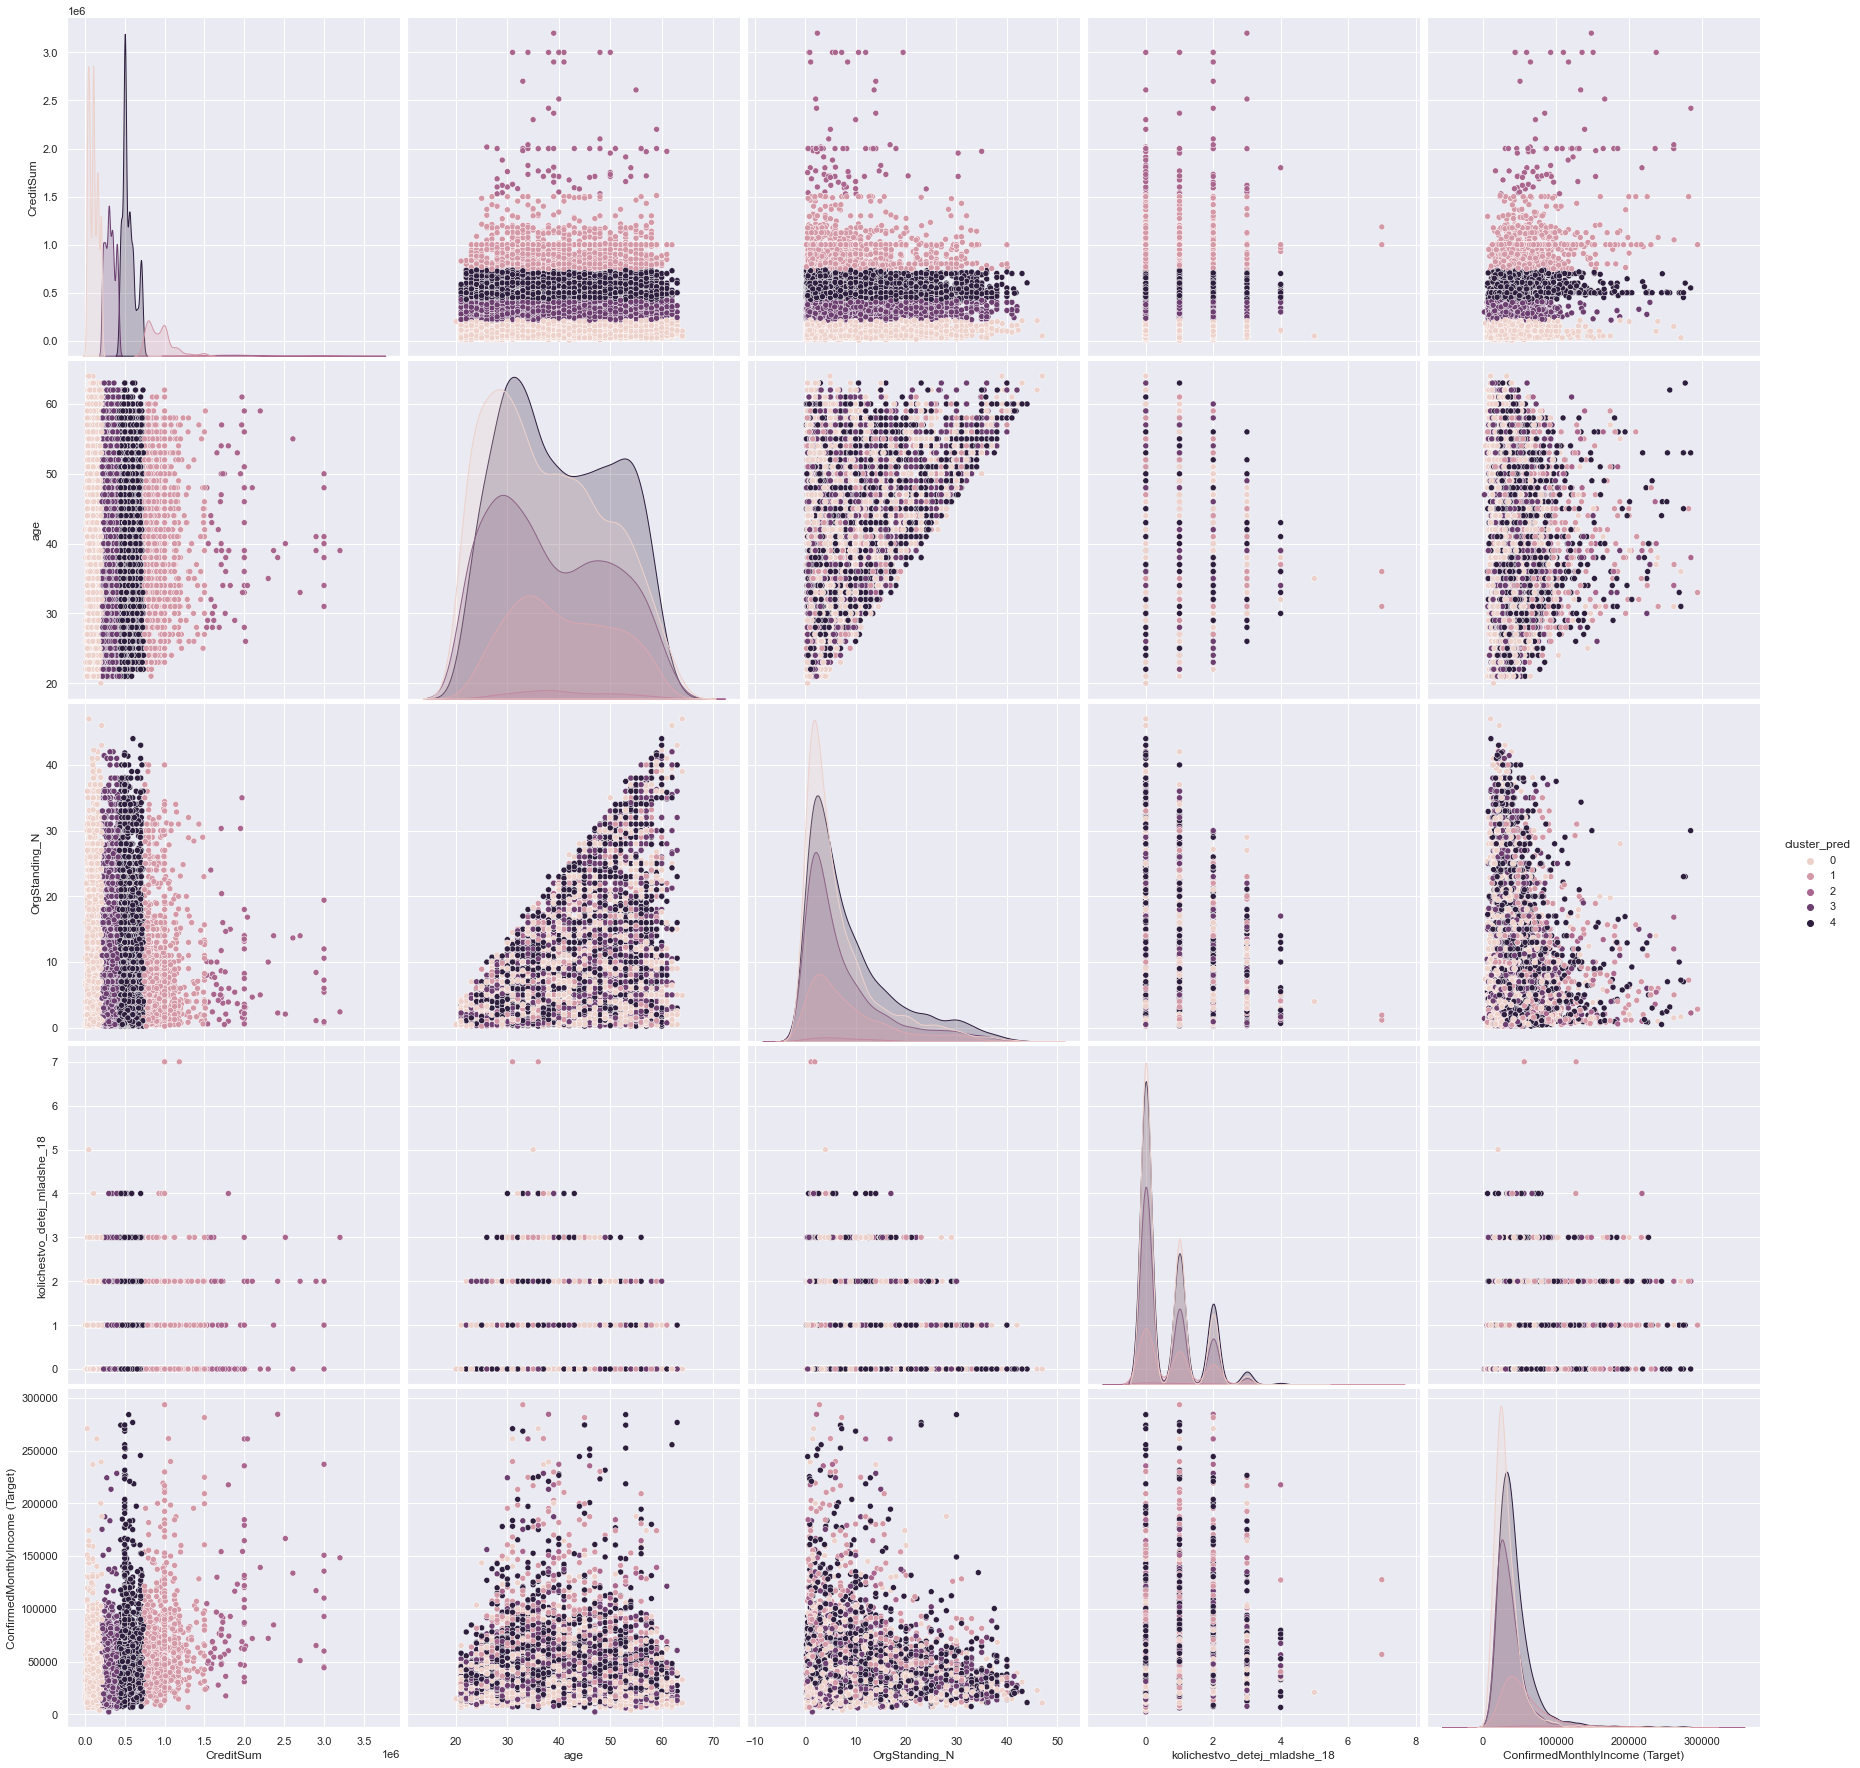

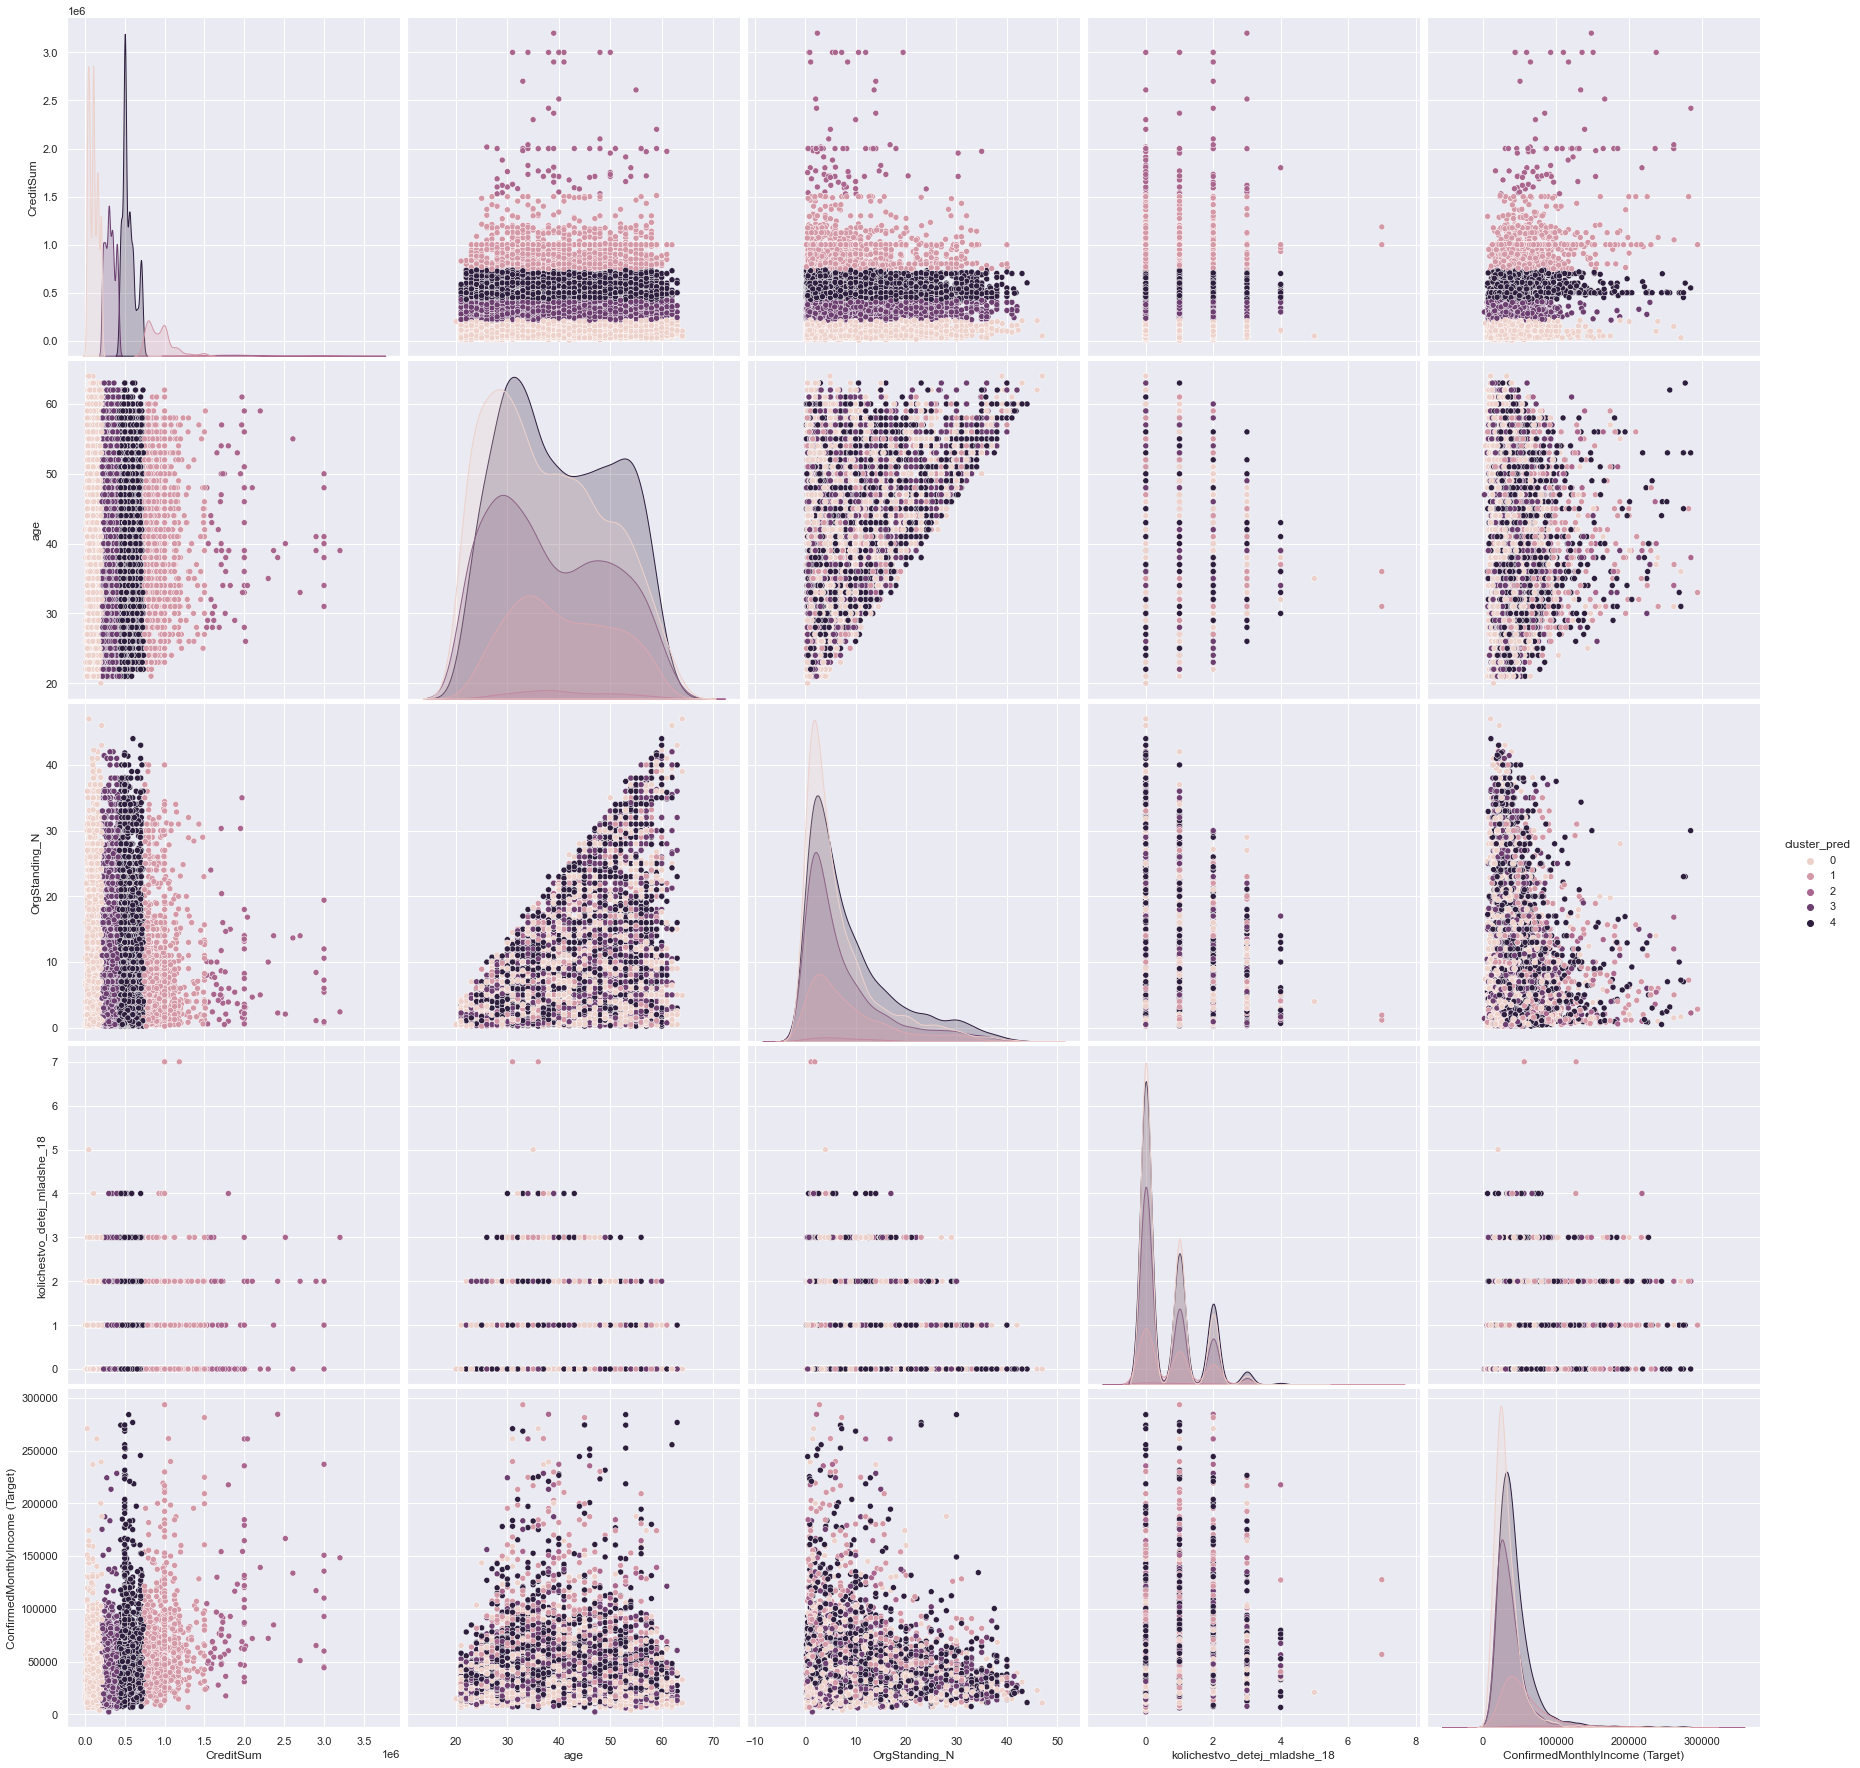

In [17]:
sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot = sns.pairplot(clusters_scaled, hue='cluster_pred', size=5, diag_kind='kde')
sns_plot.savefig("kohimg.png")

In [18]:
import researchpy as rp

In [19]:
rp.summary_cont(clusters_scaled['OrgStanding_N'].groupby(clusters_scaled['cluster_pred']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster_pred,,,,,,
0,3457,6.8155,7.6786,0.1306,6.5594,7.0715
1,1065,8.7919,8.3518,0.2559,8.2898,9.2941
2,79,8.3724,7.2010,0.8102,6.7594,9.9853
3,2319,7.5118,8.2199,0.1707,7.1771,7.8466
4,3585,8.9859,8.8419,0.1477,8.6963,9.2754


In [20]:
Cs=[0,0,0,0,0]
lenght=[0,0,0,0,0]
CsCentr=[0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            Cs[j]=Cs[j] + clusters_scaled['CreditSum'][i]
            lenght[j]=lenght[j]+1
            CsCentr[j]=Cs[j]/lenght[j]
print(CsCentr)

[104504.7486201909, 937744.0718685444, 2042442.7460759494, 313911.2371625701, 548050.9048814502]


In [21]:
age=[0,0,0,0,0]
lenght=[0,0,0,0,0]
ageCentr=[0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            age[j]=age[j] + clusters_scaled['age'][i]
            lenght[j]=lenght[j]+1
            ageCentr[j]=age[j]/lenght[j]
print(ageCentr)

[37.67139137980908, 40.71830985915493, 41.46835443037975, 38.39413540319103, 40.15871687587169]


In [22]:
OrgStanding_N=[0,0,0,0,0]
lenght=[0,0,0,0,0]
OrgStanding_NCentr=[0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            OrgStanding_N[j]=OrgStanding_N[j] + clusters_scaled['OrgStanding_N'][i]
            lenght[j]=lenght[j]+1
            OrgStanding_NCentr[j]=OrgStanding_N[j]/lenght[j]
print(OrgStanding_NCentr)

[6.815494945328266, 8.791940352112652, 8.372362556962026, 7.5118224562311, 8.985866867782375]


In [23]:
kd=[0,0,0,0,0]
lenght=[0,0,0,0,0]
kdCentr=[0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            kd[j]=kd[j] + clusters_scaled['kolichestvo_detej_mladshe_18'][i]
            lenght[j]=lenght[j]+1
            kdCentr[j]=kd[j]/lenght[j]
print(kdCentr)

[0.5756436216372577, 0.7624413145539906, 0.9493670886075949, 0.5786977145321259, 0.6368200836820084]


In [24]:
target=[0,0,0,0,0]
lenght=[0,0,0,0,0]
targetCentr=[0,0,0,0,0]
for i in range(0, 10505):
    for j in range(0,8):
        if (clusters_scaled['cluster_pred'][i] == j):
            target[j]=target[j] + clusters_scaled['ConfirmedMonthlyIncome (Target)'][i]
            lenght[j]=lenght[j]+1
            targetCentr[j]=target[j]/lenght[j]
print(targetCentr)

[32241.89918137112, 58124.773305164315, 98773.60560759493, 35793.85218542475, 43829.00255509062]


In [25]:
B=[CsCentr,ageCentr,OrgStanding_NCentr,kdCentr,targetCentr]
clustCentr = np.asarray(B)
clustCentr = np.transpose(clustCentr)
clustCentr

array([[1.04504749e+05, 3.76713914e+01, 6.81549495e+00, 5.75643622e-01,
        3.22418992e+04],
       [9.37744072e+05, 4.07183099e+01, 8.79194035e+00, 7.62441315e-01,
        5.81247733e+04],
       [2.04244275e+06, 4.14683544e+01, 8.37236256e+00, 9.49367089e-01,
        9.87736056e+04],
       [3.13911237e+05, 3.83941354e+01, 7.51182246e+00, 5.78697715e-01,
        3.57938522e+04],
       [5.48050905e+05, 4.01587169e+01, 8.98586687e+00, 6.36820084e-01,
        4.38290026e+04]])

In [26]:
from sklearn.preprocessing import StandardScaler
stscaler1 = StandardScaler().fit(clustCentr)
clustCentr = stscaler1.transform(clustCentr)
clustCentr

array([[-0.9998701 , -1.40829035, -1.5676308 , -0.88242316, -0.88864371],
       [ 0.2166887 ,  0.72566966,  0.85294003,  0.43677778,  0.18062061],
       [ 1.82958772,  1.25097584,  0.33907926,  1.75688326,  1.85989107],
       [-0.69412924, -0.90210456, -0.71483211, -0.86085457, -0.74190666],
       [-0.35227707,  0.33374941,  1.09044362, -0.45038331, -0.40996131]])

In [27]:
import math
from math import sqrt

In [28]:
kolKl=5
kolOb=5

In [29]:
# кол-во элементов в каждом кластере
N = [0,0,0,0,0]
for l in range(0,kolKl):
    N[l] = clusters_scaled.groupby(['cluster_pred'])['CreditSum'].count()[l]
    print(N[l])

3457
1065
79
2319
3585


In [30]:
# общий центр (координаты)
obcentrx = [0,0,0,0,0,0,0,0,0,0,0]
# j - номер признака
for j in range(0,kolOb):
    for l in range(0,kolKl):
        obcentrx[j] = obcentrx[j]+N[l]*clustCentr[l][j]
    obcentrx[j]=obcentrx[j]/9262
    print(obcentrx[j])

-0.6428243444908917
-0.5282102452468637
-0.2410479991590703
-0.6540186446941257
-0.639488425913239


In [31]:
# вычисляем евклидово расстояние от центра кластера до общего центра
d=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
d2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for l in range(0,kolKl):
    for j in range(0,kolOb):
        d2[l] = d2[l]+(clustCentr[l][j]-obcentrx[j])**2 
        d[l] = math.sqrt(d2[l])
    print(d[l])
    print(d2[l])
    print('------')

1.6661607277087664
2.7760915705590063
------
2.317369839399764
5.370202972559688
------
4.655557760956231
21.674218065599796
------
0.6482060822044328
0.42017112500681986
------
1.6414664582195408
2.6944121334598035
------


In [32]:
# средневзвешенный разброс от центра кластера до общего центра (межкластерное расстояние)
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*d[l]
    k2=k2+N[l]*d2[l]
k=k/9262
k2=k2/9262
print (k)
print (k2)
SSM=k2

1.725712884378604
2.9866467598494


In [33]:
stscaler = StandardScaler().fit(data2)
db11 = stscaler.transform(data2)

In [34]:
# средний разброс в каждом кластере от объектов до центра кластера
s1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
s2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
a1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0, 10505):
    #dd - расстояние от i-го объекта до центра его кластера
    dd=0
    dd2=0
    l=clusters_scaled['cluster_pred'][i]
    a1[l]=a1[l]+1
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-clustCentr[l][j])**2
    dd= math.sqrt(dd2)   
    s1[l] = s1[l]+ dd
    s2[l]=s2[l]+dd2
for l in range(0, kolKl):
    s1[l]=s1[l]/a1[l]
    s2[l]=s2[l]/a1[l]
    print(a1[l])
    print(s1[l])
    print(s2[l])

3457
2.571525963397436
8.094044486119591
1065
2.785806312193429
8.710877343040485
79
4.7720699037312295
24.82766849572106
2319
2.159145399113133
5.88596360080801
3585
2.3840195911484954
6.4376506045017505


In [35]:
# средний внутрикластерный разброс по всем кластерам
k=0
k2=0
for l in range(0,kolKl):
    k=k+N[l]*s1[l]
    k2=k2+N[l]*s2[l]
k=k/10507
k2=k2/10507
print (k)
print (k2)
SSV=k2

2.4543076915538604
7.228334346381275


In [36]:
# средний разброс от объектов до общего центра 
s2=0
s4=0
for i in range(0, 10505):
    #dd - расстояние от i-го объекта до общего центра
    dd=0
    dd2=0
    for j in range(0,kolOb):
        dd2=dd2+(db11[i][j]-obcentrx[j])**2
    dd= math.sqrt(dd2)   
    s2 = s2+dd
    s4 = s4+dd2
s2=s2/9262
s4=s4/9262
print(s2)
print(s4)
SS=s4

2.582968997257658
7.471025309539571


In [37]:
# доля межгруппового разброса в общем разбросе
dol=SSM/SS
dol

0.3997639729630983

In [38]:
# дисперсионный анализ
import matplotlib
matplotlib.use('TkAgg')
import scipy.stats as stats

In [39]:
stats.f_oneway(clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['CreditSum'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=27659.94308327557, pvalue=0.0)

In [40]:
stats.f_oneway(clusters_scaled['age'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['age'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=32.61358683319754, pvalue=4.597110173342151e-27)

In [41]:
stats.f_oneway(clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['OrgStanding_N'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=34.69967780537073, pvalue=7.93704819266777e-29)

In [42]:
stats.f_oneway(clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['kolichestvo_detej_mladshe_18'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=15.312015483990955, pvalue=1.7233104651916806e-12)

In [43]:
stats.f_oneway(clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 0],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 1],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 2],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 3],
               clusters_scaled['ConfirmedMonthlyIncome (Target)'][clusters_scaled['cluster_pred'] == 4])

F_onewayResult(statistic=356.13490808030485, pvalue=5.289227059788255e-288)

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
bins = [-1, 0, 1, 2, 3, 10]
# bins = [-1, 0, 1, 2, 10]
labels = ['Нулевой', 'Первый','Второй','Третий','Четвертый']
# labels = ['Нулевой', 'Первый','Второй','Третий']

clusters_scaled['cluster_pred_cat'] = pd.cut(clusters_scaled['cluster_pred'], bins=bins, labels=labels)

In [46]:
clusters_scaled.head()

,CreditSum,age,OrgStanding_N,kolichestvo_detej_mladshe_18,ConfirmedMonthlyIncome (Target),cluster_pred,cluster_pred_cat
0,500000.0,49,1.25,0,30691.36,4,Четвертый
1,708000.0,44,20.00,0,25712.07,4,Четвертый
2,665000.0,29,2.00,1,31081.26,4,Четвертый
3,458000.0,59,23.00,0,17848.79,4,Четвертый
4,969000.0,51,9.25,2,115380.53,1,Первый


In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('CreditSum ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,9.186857e+14,4.0,27659.943083,0.0
Residual,8.718564e+13,10500.0,NaN,NaN


In [48]:
model = ols('age ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,1.538957e+04,4.0,32.613587,4.597110e-27
Residual,1.238674e+06,10500.0,NaN,NaN


In [49]:
model = ols('OrgStanding_N ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,9502.311235,4.0,34.699678,7.937048e-29
Residual,718841.458170,10500.0,NaN,NaN


In [50]:
model = ols('kolichestvo_detej_mladshe_18 ~ cluster_pred_cat', data=clusters_scaled).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster_pred_cat,41.938541,4.0,15.312015,1.723310e-12
Residual,7189.691730,10500.0,NaN,NaN


In [51]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
cluster_pred_cat,41.938541,4.0,10.484635,15.312015,1.723310e-12,0.005799,0.00542
Residual,7189.691730,10500.0,0.684733,NaN,NaN,NaN,NaN


In [52]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(clusters_scaled['CreditSum'], clusters_scaled['cluster_pred'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,833239.3232,0.001,824526.6946,841951.9519,True
0,2,1937937.9975,0.001,1909650.0582,1966225.9368,True
0,3,209406.4885,0.001,202733.4759,216079.5012,True
0,4,443546.1563,0.001,437620.1493,449472.1632,True
1,2,1104698.6742,0.001,1075709.6844,1133687.664,True
1,3,-623832.8347,0.001,-633035.1777,-614630.4917,True
1,4,-389693.167,0.001,-398369.0864,-381017.2475,True
2,3,-1728531.5089,0.001,-1756974.0954,-1700088.9224,True
2,4,-1494391.8412,0.001,-1522668.4957,-1466115.1867,True
3,4,234139.6677,0.001,227514.6562,240764.6793,True
